In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
#IMPORT DATA AND TAKE A QUICK LOOK:

#training = pd.read_csv('C:/Users/hangu/OneDrive/Desktop/github/Projects practice/ProjectPracticing/2023_10(2) House Prices - Advanced Regression Techniques/train.csv')
training = pd.read_csv('/Users/huannguyen/Documents/GitHub/ProjectPracticing/2023_10(2) House Prices - Advanced Regression Techniques/train.csv')

#testing = pd.read_csv('C:/Users/hangu/OneDrive/Desktop/github/Projects practice/ProjectPracticing/2023_10(2) House Prices - Advanced Regression Techniques/test.csv')
testing = pd.read_csv('/Users/huannguyen/Documents/GitHub/ProjectPracticing/2023_10(2) House Prices - Advanced Regression Techniques/test.csv')

print(training.columns, "\n")
print(training.shape)
print(testing.shape)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
training.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
# Function to create scrollable table within a small window
def create_scrollable_table(df, table_id, title):
    html = f'<h3>{title}</h3>'
    html += f'<div id="{table_id}" style="height:200px; overflow:auto;">'
    html += df.to_html()
    html += '</div>'
    return html

In [9]:
from IPython.display import display, HTML

#Summary for df_num
df_num = training.select_dtypes(include=[np.number])
sum_stats_num = df_num.describe().T

scroll_sum_stats = create_scrollable_table(sum_stats_num, 'df_num describe', 'Summary statistics (df_num)')
display(HTML(scroll_sum_stats))

print(df_num.shape)

(1460, 38)


In [10]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [11]:
#Summary for df_cat
df_cat = training.select_dtypes(include=[object])
sum_stats_cat = df_cat.describe().T

scroll_cat_stats = create_scrollable_table(sum_stats_cat, 'df_cat describe', 'Summary statistics (df_cat)')
display(HTML(scroll_cat_stats))

print(df_cat.shape)

(1460, 43)


In [12]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     588 non-null    object
 18  ExterQual      1460 non-null

In [13]:
null_values = training.isnull().sum()
scroll_null_values = create_scrollable_table(null_values.to_frame(), 'null values', 'Null values of each column')

display(HTML(scroll_null_values))

In [14]:
null_percentage = (null_values / len(training)) * 100
scroll_null_percentage = create_scrollable_table(null_percentage.to_frame(), 'null percent', 'Null percent of each column')

display(HTML(scroll_null_percentage))

print(null_percentage[null_percentage > 5])
type(null_percentage[null_percentage > 5])

LotFrontage     17.739726
Alley           93.767123
MasVnrType      59.726027
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64


pandas.core.series.Series

In [15]:
row_with_missing_values = training[training.isnull().any(axis=1)]
scroll_row_with_missing_values = create_scrollable_table(row_with_missing_values, 'missing vals', 'Row with missing values')

display(HTML(scroll_row_with_missing_values))

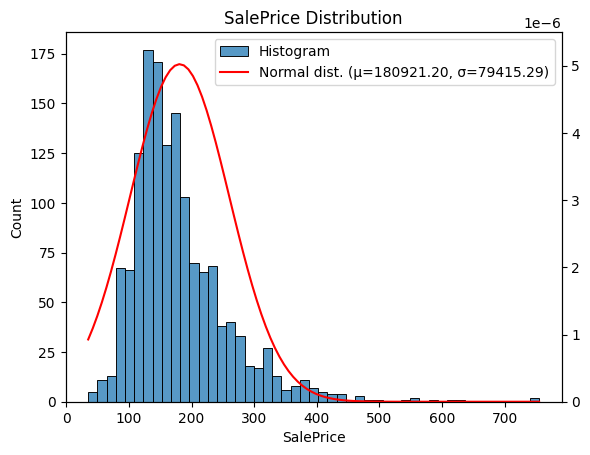

In [19]:
import plotly.graph_objects as go
import scipy.stats as stats

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

hist = sns.histplot(training['SalePrice'] / 1000, label='Histogram', ax=ax1)
hist.set_title('SalePrice Distribution')

mu, sigma = stats.norm.fit(training['SalePrice'])
x_norm = np.linspace(training['SalePrice'].min(), training['SalePrice'].max(), 100)
y_norm = stats.norm.pdf(x_norm, mu, sigma)
line = sns.lineplot(x = x_norm / 1000, y = y_norm, color='red', label=f"Normal dist. (μ={mu:.2f}, σ={sigma:.2f})", ax=ax2)
line.axes.set_ylim(0,5.5e-6)
ax2.legend_ = None

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=0)

plt.show()


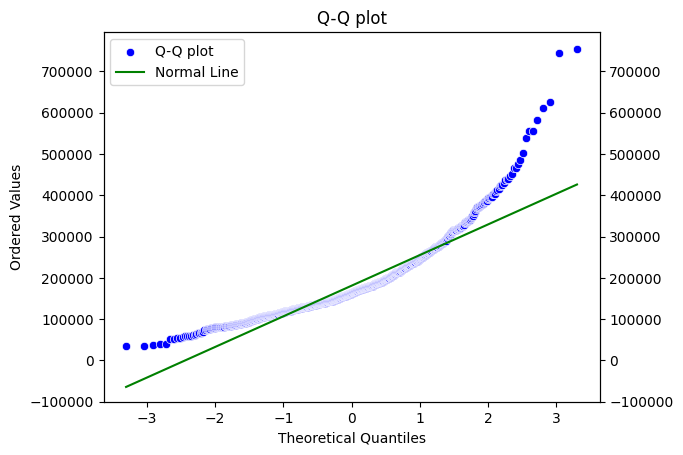

In [20]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

qq_data = stats.probplot(training['SalePrice'], dist='norm')
qq_plot = sns.scatterplot(x=qq_data[0][0], y=qq_data[0][1], label="Q-Q plot", color='blue', ax=ax1)
ax1.set(xlabel='Theoretical Quantiles', ylabel='Ordered Values', title='Q-Q plot')
qq_plot.axes.set_ylim(-100000,qq_data[0][1][-1]+40000)
ax1.legend_ = None

slope, intercept, r_value, p_value, std_err = stats.linregress(qq_data[0][0], qq_data[0][1])
line_x = np.array(qq_data[0][0])
line_y = intercept + slope * line_x
line_plot = sns.lineplot(x=line_x, y=line_y, label='Normal Line', color='green', ax=ax2)
line_plot.axes.set_ylim(-100000,qq_data[0][1][-1]+40000)
ax2.legend_ = None

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=2)

plt.show()

In [21]:
def bar_labels_USD(ax):
    for c in ax.containers:
        labels = [f'${(v.get_height() / 1000):.1f}K' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    #return ax

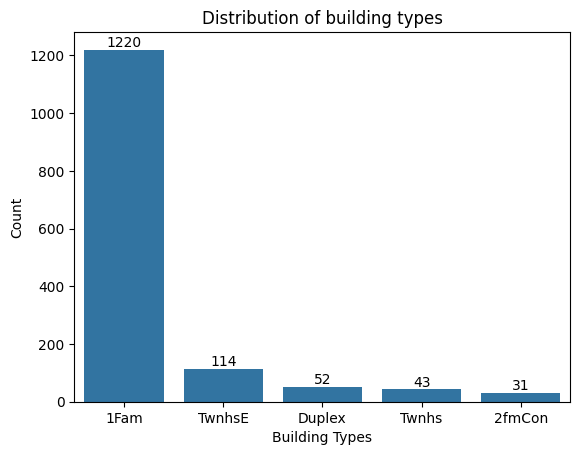

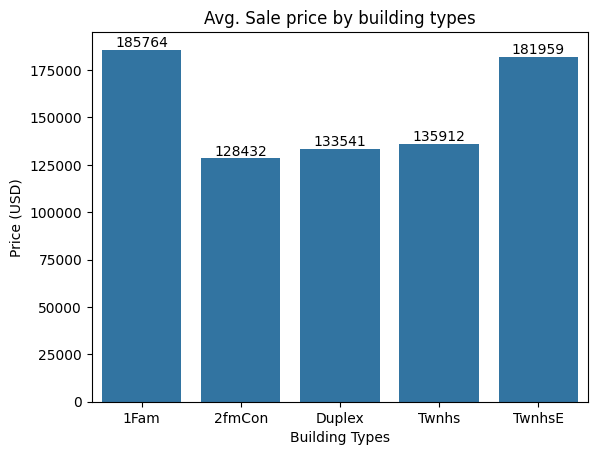

In [22]:
#DATA EXPLORATION:

#1. Distribution of dwelling types and their relation to sale prices:
dwelling_types = training['BldgType'].value_counts()
dwelling_prices = training.groupby('BldgType')['SalePrice'].mean()

ax = sns.barplot(data=dwelling_types)
ax.bar_label(ax.containers[0])
ax.set(title='Distribution of building types', xlabel='Building Types', ylabel='Count')

plt.show()

ax1 = sns.barplot(data=dwelling_prices)
ax1.bar_label(ax1.containers[0])
ax1.set(title='Avg. Sale price by building types', xlabel='Building Types', ylabel='Price (USD)')

plt.show()

/var/folders/cp/b0hzp36d1kvf85bwt0j_r5380000gn/T/ipykernel_39871/3706751380.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(data=zoning_prices, palette='plasma')


[Text(0.5, 1.0, 'Avg. Sale price by Zoning'),
 Text(0.5, 0, 'Zoning'),
 Text(0, 0.5, 'Price (USD)')]

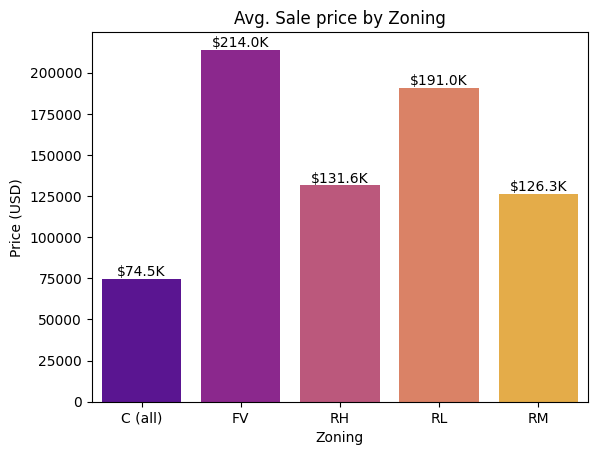

In [23]:
#2. Zoning impact on sale price:
zoning_prices = training.groupby('MSZoning')['SalePrice'].mean()

ax1 = sns.barplot(data=zoning_prices, palette='plasma')
bar_labels_USD(ax1)
ax1.set(title='Avg. Sale price by Zoning', xlabel='Zoning', ylabel='Price (USD)')

/var/folders/cp/b0hzp36d1kvf85bwt0j_r5380000gn/T/ipykernel_39871/3604638696.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(data=street_prices, palette=cols1)


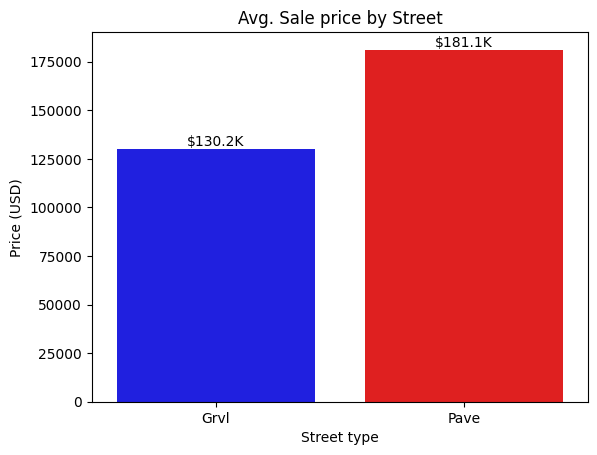

/var/folders/cp/b0hzp36d1kvf85bwt0j_r5380000gn/T/ipykernel_39871/3604638696.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(data=alley_prices, palette=cols2)


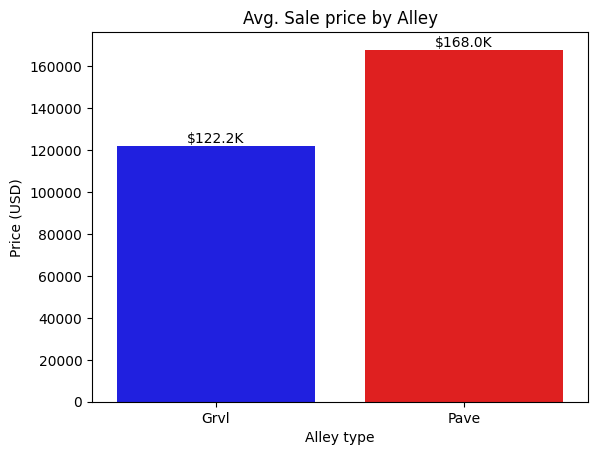

In [24]:
#3. Street and alley impact on sale price:

street_prices = training.groupby('Street')['SalePrice'].mean()
alley_prices = training.groupby('Alley')['SalePrice'].mean()

cols1 = ['red' if x == 'Pave' else 'blue' for x in street_prices.index]
ax1 = sns.barplot(data=street_prices, palette=cols1)
bar_labels_USD(ax1)
ax1.set(title='Avg. Sale price by Street', xlabel='Street type', ylabel='Price (USD)')
plt.show()

cols2 = ['red' if x == 'Pave' else 'blue' for x in alley_prices.index]
ax2 = sns.barplot(data=alley_prices, palette=cols2)
bar_labels_USD(ax2)
ax2.set(title='Avg. Sale price by Alley', xlabel='Alley type', ylabel='Price (USD)')
plt.show()


/var/folders/cp/b0hzp36d1kvf85bwt0j_r5380000gn/T/ipykernel_39871/614366880.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(data=shape_prices, palette=sns.color_palette())
/var/folders/cp/b0hzp36d1kvf85bwt0j_r5380000gn/T/ipykernel_39871/614366880.py:6: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  ax1 = sns.barplot(data=shape_prices, palette=sns.color_palette())


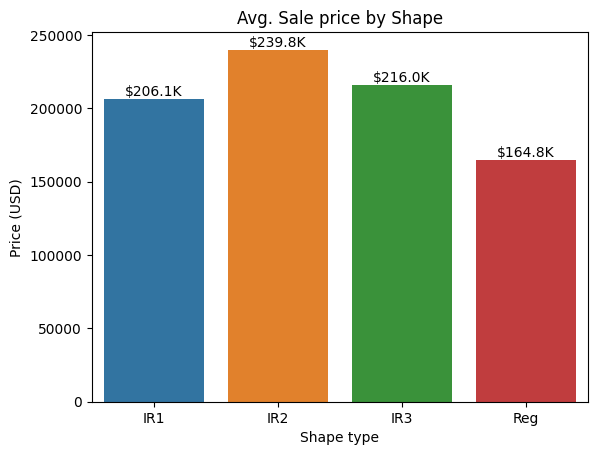

/var/folders/cp/b0hzp36d1kvf85bwt0j_r5380000gn/T/ipykernel_39871/614366880.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(data=contour_prices, palette=sns.color_palette("Spectral"))
/var/folders/cp/b0hzp36d1kvf85bwt0j_r5380000gn/T/ipykernel_39871/614366880.py:11: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  ax2 = sns.barplot(data=contour_prices, palette=sns.color_palette("Spectral"))


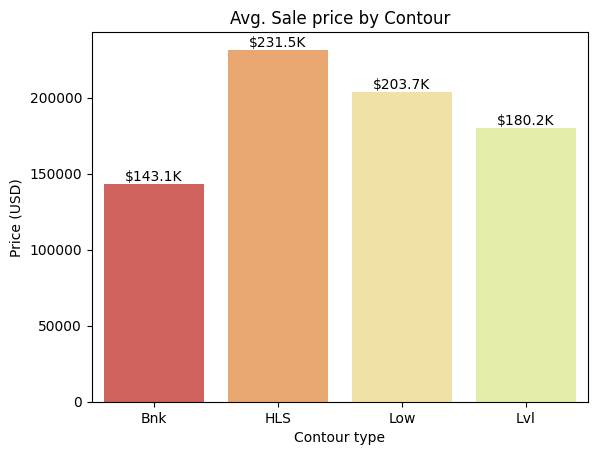

In [25]:
#4. Average sale price by property shape:

shape_prices = training.groupby('LotShape')['SalePrice'].mean()
contour_prices = training.groupby('LandContour')['SalePrice'].mean()

ax1 = sns.barplot(data=shape_prices, palette=sns.color_palette())
bar_labels_USD(ax1)
ax1.set(title='Avg. Sale price by Shape', xlabel='Shape type', ylabel='Price (USD)')
plt.show()

ax2 = sns.barplot(data=contour_prices, palette=sns.color_palette("Spectral"))
bar_labels_USD(ax2)
ax2.set(title='Avg. Sale price by Contour', xlabel='Contour type', ylabel='Price (USD)')
plt.show()

Correlation between Property Age and Sale Price: -0.5233504175468159


ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

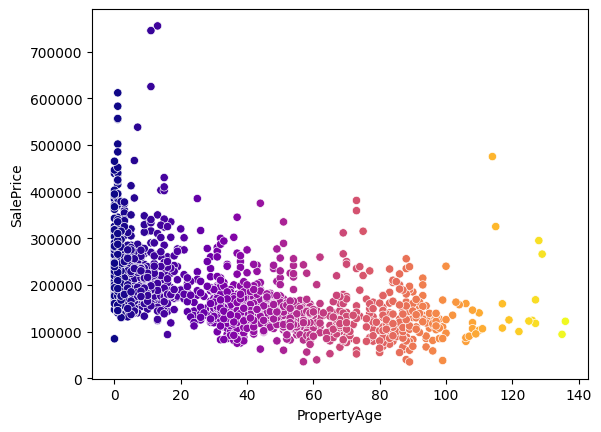

In [26]:
#5. Calculate Property Age:

training['PropertyAge'] = training['YrSold'] - training['YearBuilt']

age_price_corr = training['PropertyAge'].corr(training['SalePrice'])
print(f'Correlation between Property Age and Sale Price: {age_price_corr}')

ax = sns.scatterplot(data=training, x='PropertyAge', y='SalePrice', c=training['PropertyAge'], cmap = 'plasma')
norm = plt.Normalize(training['PropertyAge'].min(), training['PropertyAge'].max())
sm = plt.cm.ScalarMappable(cmap='plasma', norm=norm)
ax.figure.colorbar(sm)

ax.axes.set_xlim(-5, 140)
plt.show()

#OR using matplotlib:
#plt.scatter(x=training['PropertyAge'], y=training['SalePrice'], c=training['PropertyAge'], cmap = 'plasma', alpha=0.6)
#plt.colorbar()

Correlation between Living Area and Sale Price: 0.7086244776126521


ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

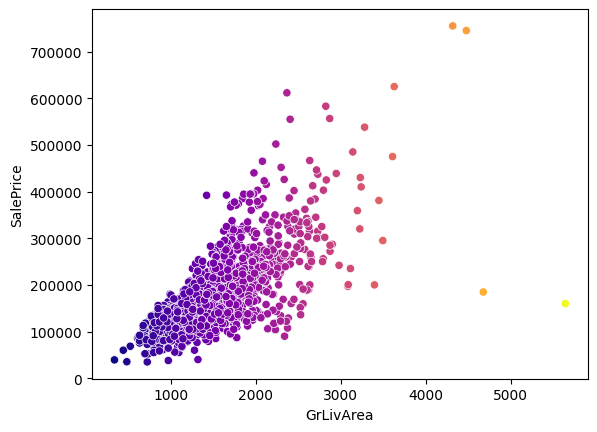

In [36]:
#6. Calculate correlation between Living Area and Sale Price:

liv_price_corr = training['GrLivArea'].corr(training['SalePrice'])
print(f'Correlation between Living Area and Sale Price: {liv_price_corr}')

ax = sns.scatterplot(data=training, x='GrLivArea', y='SalePrice', c=training['GrLivArea'], cmap = 'plasma')
norm = plt.Normalize(training['GrLivArea'].min(), training['GrLivArea'].max())
sm = plt.cm.ScalarMappable(cmap='plasma', norm=norm)
ax.figure.colorbar(sm)

plt.show()

/var/folders/cp/b0hzp36d1kvf85bwt0j_r5380000gn/T/ipykernel_39871/3433421988.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box_plot = sns.boxplot(data=training, x='YrSold', y='SalePrice', palette='plasma')


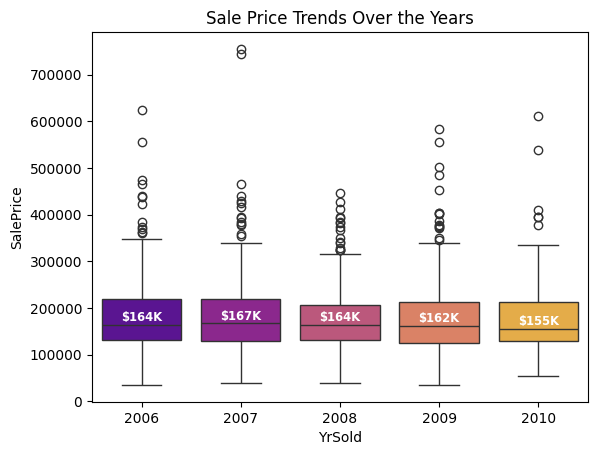

In [28]:
#7. Box plot of price over years:

yearly_avg_sale_price = training.groupby('YrSold')['SalePrice'].mean()

box_plot = sns.boxplot(data=training, x='YrSold', y='SalePrice', palette='plasma')
box_plot.set_title('Sale Price Trends Over the Years')

#Insert median value for each boxplot:
medians = training.groupby('YrSold')['SalePrice'].median()
vertical_offset = training['SalePrice'].median() * 0.05 

#plt.text(x-coor, y-coor, string)
for xtick in box_plot.get_xticks():
    plt.text(xtick, medians.values[xtick]+vertical_offset, f'${(medians.values[xtick]/1000):.0f}K',
             horizontalalignment='center',size='small',color='w',weight='semibold')

In [30]:
#CREATING A DATA PREPROCESSING PIPELINE:

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

#Define transformers for numerical and categorical columns:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

In [31]:
categorical_columns = df_cat.columns
numerical_columns = df_num.columns.drop('SalePrice') #remove target variable SalePrice

#ColumnTransformer let you choose with columns to go with which set of transformers:
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_columns),
    ('cat', categorical_transformer, categorical_columns)
])

#Create preprocessor Pipeline:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

X_train = training.drop('SalePrice', axis=1)
y_train = np.log(training['SalePrice'])

X_train_preprocessed = pipeline.fit_transform(X_train)


/Users/huannguyen/.pyenv/versions/3.11.3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
#MODEL BUILDING:

#from sklearn.linear_model import LinearRegression
#from sklearn.ensemble import RandomForestRegressor
#from xgboost import XGBRegressor
#from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, train_test_split

#NOTE: In this case, as we valuate models using GridSearchCV best_score_, we don't need to use train_test_split on X_train_preprocessed.
# However, if we want to use other metrics (e.g. "from sklearn.metrics import mean_squared_error"), it is necessary to split the data, so that we can predict y_pred based on X_test, y_test.

#Define models:
#models = {
#    'LinearRegression': LinearRegression(),
#    'RandomForest': RandomForestRegressor(random_state=123),
#    'XGBoost': XGBRegressor(random_state=123)
#}

#Define hyperparameter grids for each model:
#param_grids = {
#    'LinearRegression': {},
#    'RandomForest': {
#        'n_estimators': [100, 500],
#        'max_depth': [None, 30],
#        'min_samples_split': [2, 5]
#    },
#    'XGBoost': {
#        'n_estimators': [100, 500],
#        'learning_rate': [0.01, 0.1],
#        'max_depth': [3, 6]
#    }
#}

#3-fold CV:
#cv = KFold(n_splits=3, shuffle=True, random_state=123)

#grids = {}
#for model_name, model in models.items():
#    grids[model_name] = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=cv, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
#    grids[model_name].fit(X_train_preprocessed, y_train)
#    best_params = grids[model_name].best_params_
#    best_score = np.sqrt(-1 * grids[model_name].best_score_)
#
#    print(f'Best parameters for {model_name}: {best_params}')
#    print(f'Best RMSE score for {model_name}: {best_score}\n')


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters for LinearRegression: {}
Best RMSE score for LinearRegression: 2897734353.1291776

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best parameters for RandomForest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 500}
Best RMSE score for RandomForest: 0.14755474353791284

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
Best RMSE score for XGBoost: 0.12652760484116427



1m59s

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters for LinearRegression: {}
Best RMSE score for LinearRegression: 2897734353.1291776

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best parameters for RandomForest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 500}
Best RMSE score for RandomForest: 0.14755474353791284

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
Best RMSE score for XGBoost: 0.12652760484116427

In [32]:
#Principal Component Analysis ==> New data:

from sklearn.decomposition import PCA

pca = PCA()
X_pca_check = pca.fit_transform(X_train_preprocessed)

#Calculate the cumulative explained variance:
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

#Choose the number of components based on the explained variance threshold:
n_components = np.argmax(cumulative_explained_variance >= 0.95) + 1

pca = PCA(n_components=n_components)
pipeline_pca = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', pca)
])

X_train_preprocessed_pca = pipeline_pca.fit_transform(X_train)



/Users/huannguyen/.pyenv/versions/3.11.3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [33]:
print(len(pca.explained_variance_ratio_))
print(X_train_preprocessed.shape)
print(n_components)
print(304 - len(cumulative_explained_variance[cumulative_explained_variance >= 0.95]) + 1)

79
(1460, 304)
79
79


In [34]:
#MODEL BUILDING (New data):

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, train_test_split

#NOTE: In this case, as we valuate models using GridSearchCV best_score_, we don't need to use train_test_split on X_train_preprocessed_pca.
# However, if we want to use other metrics (e.g. "from sklearn.metrics import mean_squared_error"), it is necessary to split the data, so that we can predict y_pred based on X_test, y_test.


#Define models:
models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(random_state=123),
    'XGBoost': XGBRegressor(random_state=123)
}

#Define hyperparameter grids for each model:
param_grids = {
    'LinearRegression': {},
    'RandomForest': {
        'n_estimators': [100, 500],
        'max_depth': [None, 30],
        'min_samples_split': [2, 5]
    },
    'XGBoost': {
        'n_estimators': [100, 500],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 6]
    }
}

#3-fold CV:
cv = KFold(n_splits=3, shuffle=True, random_state=123)

grids_pca = {}
for model_name, model in models.items():
    grids_pca[model_name] = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=cv, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
    grids_pca[model_name].fit(X_train_preprocessed_pca, y_train)
    best_params = grids_pca[model_name].best_params_
    best_score = np.sqrt(-1 * grids_pca[model_name].best_score_)

    print(f'Best parameters for {model_name}: {best_params}')
    print(f'Best RMSE score for {model_name}: {best_score}\n')

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END .................................................... total time=   0.0s[CV] END .................................................... total time=   0.0s

[CV] END .................................................... total time=   0.0s
Best parameters for LinearRegression: {}
Best RMSE score for LinearRegression: 0.1506445635444165

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   4.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   4.5s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   3.8s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   3.8s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   3.9s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   4.0s
[CV] END max_depth=30, min_samples_split=

3m40s

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters for LinearRegression: {}
Best RMSE score for LinearRegression: 0.1496290581022443

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best parameters for RandomForest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best RMSE score for RandomForest: 0.14388745230824493

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
Best RMSE score for XGBoost: 0.13435846956353925